# Bharat intern
## Task 2 - Titanic classification

In [67]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# loading datasets
titanic = pd.read_csv(r"C:\Users\HP\Downloads\Titanic-Dataset.csv")

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
titanic.shape

(891, 12)

In [71]:
# statistical info
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
# datatype information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Exploratory Data Analysis

In [74]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [75]:
titanic.groupby('Survived').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_25724\26634106.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [76]:
num_male = len(titanic[titanic['Sex']=='male'])
print("number of males in titanic:",num_male)

number of males in titanic: 577


In [77]:
num_female= len(titanic[titanic['Sex']=='female'])
print("number of females in titanic:",num_female)

number of females in titanic: 314


(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

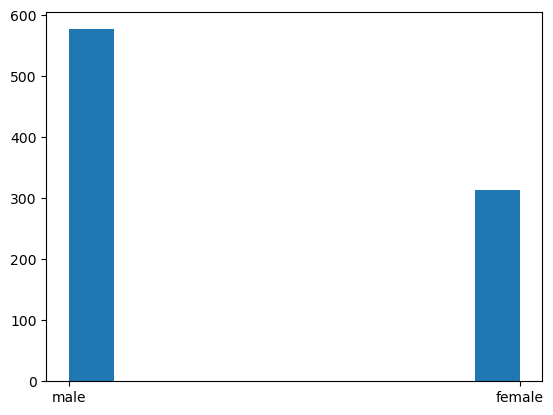

In [78]:
#Plotting
plt.hist(titanic.Sex)

In [79]:
survived = len(titanic[titanic['Survived']==1])
non_survived =len(titanic[titanic['Survived']==0])
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Survived', ylabel='count'>

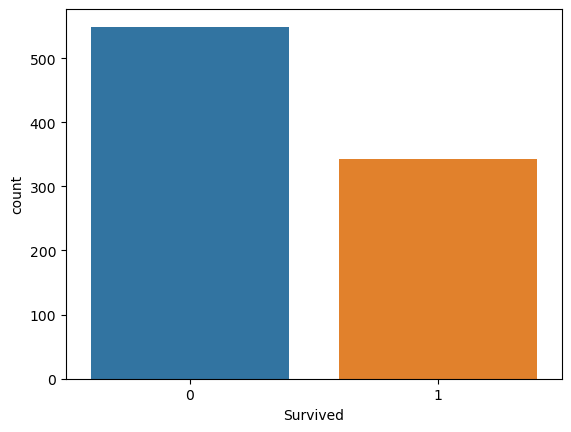

In [80]:
# count plot of survived and not survived
sns.countplot(x ='Survived', data= titanic)

<Axes: xlabel='Survived', ylabel='count'>

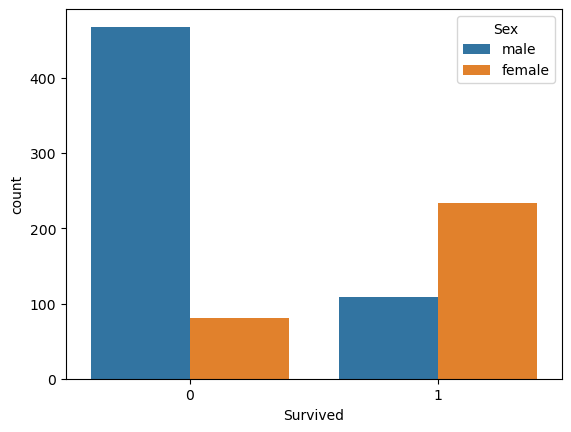

In [81]:
# male vs Female survival
sns.countplot(x='Survived',data= titanic, hue='Sex')

([<matplotlib.axis.XTick at 0x1de557132b0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

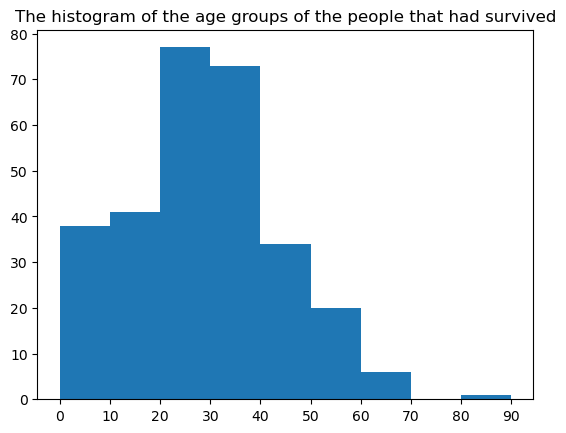

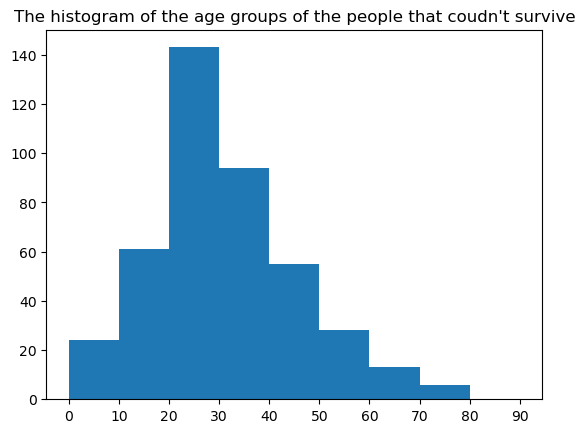

In [82]:
plt.figure(1)
age  = titanic.loc[titanic.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = titanic.loc[titanic.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [83]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [84]:
titanic[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [85]:
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Survived', ylabel='count'>

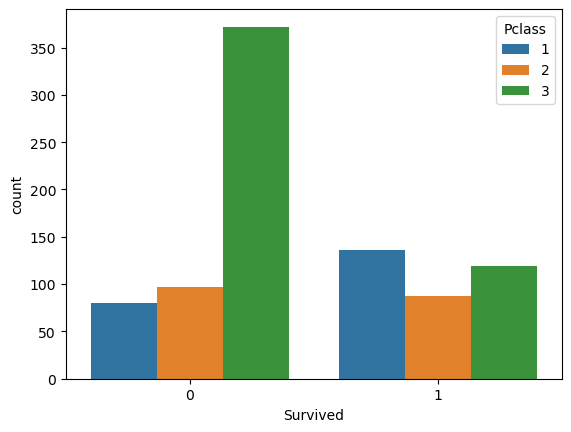

In [86]:
sns.countplot(x='Survived',hue = 'Pclass', data = titanic)

### Data preprocessing

In [87]:
# checking missing values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### visulizing null values

<Axes: >

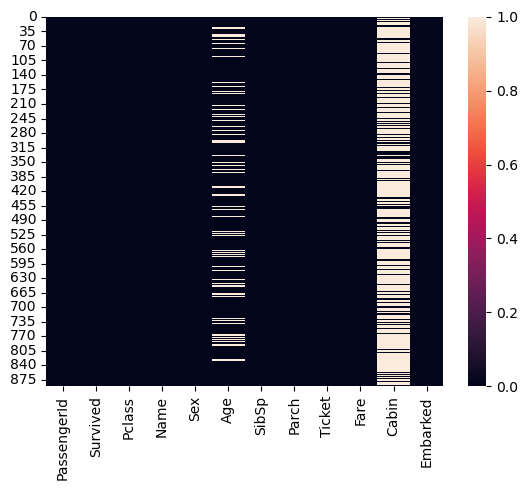

In [88]:
# visulizing using heatmap
sns.heatmap(titanic.isna())

In [89]:
# finding the %  of null values
(titanic['Age'].isna().sum()/len(titanic['Age']))*100

19.865319865319865

In [90]:
# finging the % of null values in Cabin
(titanic['Cabin'].isna().sum()/len(titanic['Cabin']))*100

77.10437710437711

here we can see that 77% of missing values in cabin column, actually the column is not necessory for our prediction. There for dropping unwanted columns

In [92]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)
titanic['Age'].isna().sum()

0

### converting sex column into numerical values 

In [94]:
gender = pd.get_dummies(titanic['Sex'],drop_first = True)
titanic['Gender'] = gender

### Droping the columns which are not  required

In [95]:
titanic.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis = 1, inplace = True)

In [96]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


### Seperating Dependent and Independent variables

In [98]:
x = titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y = titanic['Survived']

### Data modelling

In [99]:
# Training testing and spliting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [100]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_test, y_pred))

accuracy score: 0.7835820895522388


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print(classification_report(y_test, y_pred))

[[133  24]
 [ 34  77]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.76      0.69      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [106]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train,y_train)

pred_y = model1.predict(x_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,pred_y))

Acc= 0.6082089552238806


In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,pred_y)
print(confusion_mat)
print(classification_report(y_test,pred_y))

[[152   5]
 [100  11]]
              precision    recall  f1-score   support

           0       0.60      0.97      0.74       157
           1       0.69      0.10      0.17       111

    accuracy                           0.61       268
   macro avg       0.65      0.53      0.46       268
weighted avg       0.64      0.61      0.51       268



In [109]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.7910447761194029


In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred3)
print(confusion_mat)
print(classification_report(y_test,y_pred3))

[[130  27]
 [ 29  82]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       157
           1       0.75      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [111]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=42)
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.7798507462686567


In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred4)
print(confusion_mat)
print(classification_report(y_test,y_pred4))

[[132  25]
 [ 34  77]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

